In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

커널 PCA  
기존 주성분 분석은 데이터 행렬 $X$의 공분산 행렬을 고유값 분해한 후 고유 벡터를 새로운 좌표축에 할당하는 방법이었다.  
기존의 데이터 포인트는 새로운 좌표축을 기준으로 좌표를 할당받았다. 이때 사용하는 새로운 좌표축에 해당하는 고유 벡터를 주성분이라고 불렀으며, 기존 데이터 포인트를 주성분에 직교 정사영하는 방법을 사용했다. 이에 반해 커널 PCA는 기존 PCA을 일반화한 방법으로 비선형적으로 수행하는 방법이다.

기존 데이터 행렬 $X$를 기존 행렬보다 큰 공간으로 매핑한 후 새로운 공간으로 이동한 데이터에 대해서 주성분 분석을 실시한다. 그리고 데이터를 다시 원래 공간으로 매핑시키면 곡선형태를 띤 주성분 축을 확인할 수 있다.

다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [3]:
# 피쳐, 타겟 데이터 저장
X = raw_wine.data # 피쳐 데이터를 저장한다.
y = raw_wine.target # 타겟 데이터를 저장한다.
X.shape

(178, 13)

In [4]:
# 트레이닝, 테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝, 테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, y_tn.shape, X_te.shape, y_te.shape)

(133, 13) (133,) (45, 13) (45,)


In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
X_tn_std = std_scale.fit_transform(X_tn) # 트레이닝 데이터를 적합 후 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 데이터를 표준화 한다.

In [6]:
# 커널 PCA를 통한 차원 축소
from sklearn.decomposition import KernelPCA # 커널 PCA 알고리즘을 사용하기 위해 import 한다.
# 커널 PCA 객체를 생성할 때 n_components 속성에 축소할 차원의 크기를 설정한다.
# 커널 PCA 객체를 생성할 때 kernel 속성에 커널 PCA의 형태를 설정한다.
# kernel 속성의 기본값은 linear이고 poly, rbf, sigmoid, cosine를 지정할 수 있다.
k_pca = KernelPCA(n_components=2, kernel='poly') # 커널 PCA 모델을 만든다.
# 커널 PCA를 실행할 때 트레이닝 데이터를 기반으로 실행하므로 표준화된 트레이닝 피쳐 데이터 X_tn_std를 
# 커널 PCA 객체에 적합시킨다.
# k_pca.fit(X_tn_std)
# X_tn_kpca = k_pca.transform(X_tn_std) # 적합된 커널 PCA 모델을 바탕으로 표준화된 트레이닝 데이터의 차원을 축소한다.
X_tn_kpca = k_pca.fit_transform(X_tn_std)
X_te_kpca = k_pca.transform(X_te_std) # 적합된 커널 PCA 모델을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [7]:
# 차원 축소 확인
print(X_tn_std.shape, X_tn_kpca.shape, X_te_std.shape, X_te_kpca.shape)

(133, 13) (133, 2) (45, 13) (45, 2)


In [8]:
# 고유값과 고유 벡터 확인
print(k_pca.lambdas_) # 고유값
print(k_pca.alphas_) # 고유 벡터

[193.89824561 118.0368972 ]
[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]


차원 축소된 데이터 시각화

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
kpca_columns = ['kpca_comp1', 'kpca_comp2']
X_tn_kpca_df = pd.DataFrame(X_tn_kpca, columns=kpca_columns)
X_tn_kpca_df['target'] = y_tn
X_tn_kpca_df

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0
...,...,...,...
128,-0.935327,0.094699,2
129,-2.091781,0.684901,2
130,-0.177160,-0.674989,1
131,-1.179702,0.125194,2


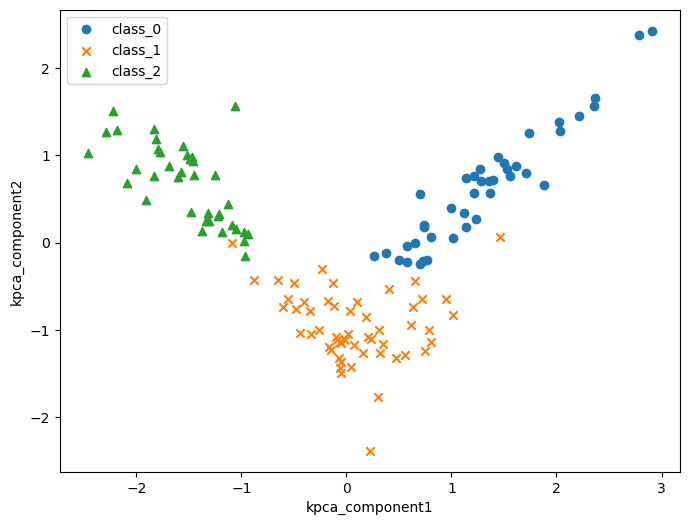

In [10]:
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^']

for index, marker in enumerate(markers):
    df_index = X_tn_kpca_df[X_tn_kpca_df.target == index]
    target_index = raw_wine.target_names[index]
    X1 = df_index.kpca_comp1
    X2 = df_index.kpca_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('kpca_component1')
plt.ylabel('kpca_component2')
plt.legend()
plt.show()

커널 PCA 적용 전 데이터 학습

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


커널 PCA 적용 후 데이터 학습

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf_kpca = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca)
accuracy = accuracy_score(y_te, pred_rf_kpca)
print(accuracy)

0.9555555555555556
